¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
import math as mt 
from scipy.stats import ttest_ind# Cargar todas las librerías



## Cargar datos

In [4]:
users= pd.read_csv("/datasets/megaline_users.csv")
calls= pd.read_csv("/datasets/megaline_calls.csv")
messages= pd.read_csv("/datasets/megaline_messages.csv")
internet= pd.read_csv("/datasets/megaline_internet.csv")
plans= pd.read_csv("/datasets/megaline_plans.csv")
# Carga los archivos de datos en diferentes DataFrames



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [5]:
print(plans.info())# Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [6]:
print(plans.head())# Imprime una muestra de los datos para las tarifas



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
#No es necesario corregir problemas en este dataframe

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [8]:
plans["mb_per_month_included"] = plans["mb_per_month_included"] / 1024
plans = plans.rename(columns={"mb_per_month_included": "gb_per_month_included"})
plans = plans.rename(columns={"plan_name" : "plan"})

print(plans)

   messages_included  gb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute      plan  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo usar la función de math.ceil() cuando redondeamos hacia arriba lo valores, dado que si lo que hacemos es transformalos a int solamente eliminamos la parte decimal y para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.. 
</div>

##Muchas gracias por tus comentarios Tonatiuh, en este caso use la función .ceil( ) un poco mas abajo en la sección de agregar datos por usuario para poder calcular el ingreso.  

## Usuarios/as

In [9]:
print(users.info())# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [10]:
print(users.head())# Imprime una muestra de datos para usuarios



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:

duplicados = users.duplicated(subset=["user_id"], keep=False)

filas_duplicadas = users[duplicados]

print("Las filas con valores duplicados en la columna user_id son:")
print(filas_duplicadas)

print()

valores_nulos= users.isnull().sum()
print("Los valores nulos en el df son:")
print(valores_nulos)


Las filas con valores duplicados en la columna user_id son:
Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []

Los valores nulos en el df son:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
#no es necesario enriquecer este dataframe y no se realizan correcciones ya que los valores nulos 
#son fechas de cancelación que no generan problemas. 

## Llamadas

In [13]:
print(calls.info())# Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [14]:
print(calls.head(10))# Imprime una muestra de datos para las llamadas



         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
duplicados = calls.duplicated(subset=["id"], keep=False)

filas_duplicadas = calls[duplicados]

print("Las filas con valores duplicados en la columna id son:")
print(filas_duplicadas)

print()

valores_nulos= calls.isnull().sum()
print("Los valores nulos en el df son:")
print(valores_nulos)

# no parecen existir problemas obvios en las observaciones iniciales. 

Las filas con valores duplicados en la columna id son:
Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []

Los valores nulos en el df son:
id           0
user_id      0
call_date    0
duration     0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
calls = calls.rename(columns={"id": "call_id"})
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls["month"]= calls["call_date"].dt.month
print(calls.head())


    call_id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27      8.52     12
1  1000_145     1000 2018-12-27     13.66     12
2  1000_247     1000 2018-12-27     14.48     12
3  1000_309     1000 2018-12-28      5.76     12
4  1000_380     1000 2018-12-30      4.22     12


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

Listo, ya agregué el "format=%Y-%m-%d"

## Mensajes

In [17]:
print(messages.info())# Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [18]:
print(messages.head())# Imprime una muestra de datos para los mensajes



         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
duplicados = messages.duplicated(subset=["id"], keep=False)

filas_duplicadas = messages[duplicados]

print("Las filas con valores duplicados en la columna id son:")
print(filas_duplicadas)

print()

valores_nulos= messages.isnull().sum()
print("Los valores nulos en el df son:")
print(valores_nulos)

Las filas con valores duplicados en la columna id son:
Empty DataFrame
Columns: [id, user_id, message_date]
Index: []

Los valores nulos en el df son:
id              0
user_id         0
message_date    0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
messages = messages.rename(columns={"id": "messages_id"})
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages["month"]= messages["message_date"].dt.month
print(messages.head())

  messages_id  user_id message_date  month
0    1000_125     1000   2018-12-27     12
1    1000_160     1000   2018-12-31     12
2    1000_223     1000   2018-12-31     12
3    1000_251     1000   2018-12-27     12
4    1000_255     1000   2018-12-26     12


## Internet

In [21]:
print(internet.info())# Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [22]:
print(internet.head())# Imprime una muestra de datos para el tráfico de internet



         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
duplicados = internet.duplicated(subset=["id"], keep=False)

filas_duplicadas = internet[duplicados]

print("Las filas con valores duplicados en la columna id son:")
print(filas_duplicadas)

print()

valores_nulos= internet.isnull().sum()
print("Los valores nulos en el df son:")
print(valores_nulos)

Las filas con valores duplicados en la columna id son:
Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []

Los valores nulos en el df son:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [24]:
internet = internet.rename(columns={"id": "int_session_id"})
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet["month"]= internet["session_date"].dt.month
internet= internet.rename(columns={"mb_used": "gb_used"})
internet["gb_used"] = internet["gb_used"] / 1024

print(internet.head(20))

   int_session_id  user_id session_date   gb_used  month
0         1000_13     1000   2018-12-29  0.087754     12
1        1000_204     1000   2018-12-31  0.000000     12
2        1000_379     1000   2018-12-28  0.644922     12
3        1000_413     1000   2018-12-26  0.264639     12
4        1000_442     1000   2018-12-27  0.859590     12
5          1001_0     1001   2018-08-24  0.278008      8
6          1001_3     1001   2018-12-09  0.640664     12
7          1001_4     1001   2018-11-04  0.016572     11
8         1001_10     1001   2018-11-27  0.132012     11
9         1001_15     1001   2018-12-13  0.744062     12
10        1001_16     1001   2018-10-28  0.489775     10
11        1001_17     1001   2018-09-05  0.710244      9
12        1001_24     1001   2018-09-05  0.607451      9
13        1001_25     1001   2018-10-14  0.303154     10
14        1001_26     1001   2018-09-17  0.000000      9
15        1001_27     1001   2018-12-13  0.145674     12
16        1001_28     1001   20

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [25]:
print(plans.head())
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras



   messages_included  gb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute      plan  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [26]:
calls_by_month = calls.groupby(['user_id', 'month']).agg(
    total_calls=('call_id', 'count'),
    ).reset_index()

calls_by_month.head(10)
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.



,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

Tomo nota de tu sugerencia, no la uso por que todabia no me queda claro su funcionamiento, pero me 

In [27]:
minutes_by_month = calls.groupby(['user_id', 'month']).agg(
    total_minutes=('duration', 'sum'),
    ).reset_index()

minutes_by_month.head(10)# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.



,user_id,month,total_minutes
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
5,1001,12,392.93
6,1002,10,54.13
7,1002,11,359.76
8,1002,12,363.24
9,1003,12,1041.00


In [28]:
messages_by_month= messages.groupby(["user_id", "month"]).agg(
    total_messages=("messages_id", "count")
    ).reset_index()

messages_by_month.head(10)
    # Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [29]:
gb_by_month = internet.groupby(["user_id", "month"]).agg(
    total_gb=("gb_used", "sum")
).reset_index()

gb_by_month.head(10)

# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



,user_id,month,total_gb
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
5,1001,12,18.915215
6,1002,10,6.398447
7,1002,11,18.891680
8,1002,12,14.058828
9,1003,12,26.410293


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [30]:
data_fusion = pd.merge(
    pd.merge(minutes_by_month, messages_by_month, on=["user_id", "month"], how="outer"),
    gb_by_month,
    on=["user_id", "month"],
    how="outer"
)

data_fusion.head()

print()

data_fusion.fillna(0, inplace=True)

data_fusion.isna().sum()
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month



user_id           0
month             0
total_minutes     0
total_messages    0
total_gb          0
dtype: int64

In [31]:
data_fusion_plan = pd.merge(
    data_fusion,
    users,
    on=["user_id"],
    how="left"
)

data_fusion_plan_info= pd.merge(
data_fusion_plan,
plans,
on=["plan"],
how="outer"
)

# Añade la información de la tarifa

data_fusion_plan_info = data_fusion_plan_info.drop(["first_name", "last_name", "age", "reg_date","churn_date"], axis=1)

data_fusion_plan_info.head()

,user_id,month,total_minutes,total_messages,total_gb,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,116.83,11.0,1.856904,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01
1,1006,11,9.32,15.0,2.019893,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01
2,1006,12,54.79,139.0,31.366035,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01
3,1008,10,450.21,21.0,16.706045,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01
4,1008,11,422.81,37.0,23.121797,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [32]:
data_fusion_plan_info["exc_min"]= (data_fusion_plan_info["total_minutes"]- data_fusion_plan_info['minutes_included']).clip(lower=0)
data_fusion_plan_info["exc_mes"]= (data_fusion_plan_info["total_messages"]- data_fusion_plan_info['messages_included']).clip(lower=0)
data_fusion_plan_info["exc_gb"]= (data_fusion_plan_info["total_gb"]- data_fusion_plan_info['gb_per_month_included']).clip(lower=0).apply(np.ceil)

data_fusion_plan_info['bill_min'] = (data_fusion_plan_info['exc_min'] * data_fusion_plan_info['usd_per_minute'])
data_fusion_plan_info['bill_mes'] = (data_fusion_plan_info['exc_mes'] * data_fusion_plan_info['usd_per_message'])
data_fusion_plan_info['bill_gb'] = (data_fusion_plan_info['exc_gb'] * data_fusion_plan_info['usd_per_gb'])

data_fusion_plan_info["income_month"]= (data_fusion_plan_info["usd_monthly_pay"]+ data_fusion_plan_info["bill_min"]+data_fusion_plan_info["bill_mes"] +data_fusion_plan_info["bill_gb"])

data_fusion_plan_info.sample(20)



# Calcula el ingreso mensual para cada usuario



,user_id,month,total_minutes,total_messages,total_gb,city,plan,messages_included,gb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,exc_min,exc_mes,exc_gb,bill_min,bill_mes,bill_gb,income_month
3,1008,10,450.21,21.0,16.706045,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30.0,3000,...,7,0.01,0.01,0.00,0.0,0.0,0.0000,0.00,0.0,70.0000
1956,1381,11,449.97,180.0,23.121348,"Austin-Round Rock-Georgetown, TX MSA",surf,50,15.0,500,...,10,0.03,0.03,0.00,130.0,9.0,0.0000,3.90,90.0,113.9000
1271,1172,9,598.37,119.0,31.787578,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15.0,500,...,10,0.03,0.03,98.37,69.0,17.0,2.9511,2.07,170.0,195.0211
215,1150,12,455.45,0.0,12.579199,"Houston-The Woodlands-Sugar Land, TX MSA",ultimate,1000,30.0,3000,...,7,0.01,0.01,0.00,0.0,0.0,0.0000,0.00,0.0,70.0000
18,1028,5,62.97,84.0,32.136553,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",ultimate,1000,30.0,3000,...,7,0.01,0.01,0.00,0.0,3.0,0.0000,0.00,21.0,91.0000
317,1214,8,419.68,20.0,17.751143,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30.0,3000,...,7,0.01,0.01,0.00,0.0,0.0,0.0000,0.00,0.0,70.0000
1499,1252,6,258.07,13.0,8.081455,"Detroit-Warren-Dearborn, MI MSA",surf,50,15.0,500,...,10,0.03,0.03,0.00,0.0,0.0,0.0000,0.00,0.0,20.0000
1405,1216,9,93.85,0.0,4.822588,"San Francisco-Oakland-Berkeley, CA MSA",surf,50,15.0,500,...,10,0.03,0.03,0.00,0.0,0.0,0.0000,0.00,0.0,20.0000
1221,1156,11,605.26,0.0,17.712402,"Albuquerque, NM MSA",surf,50,15.0,500,...,10,0.03,0.03,105.26,0.0,3.0,3.1578,0.00,30.0,53.1578
1494,1251,8,581.97,20.0,33.666377,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15.0,500,...,10,0.03,0.03,81.97,0.0,19.0,2.4591,0.00,190.0,212.4591


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

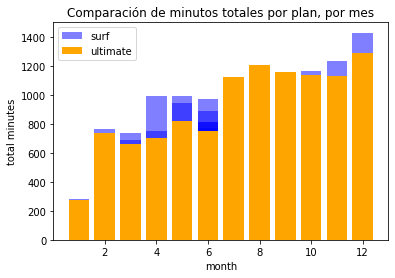

In [33]:
surf_calls= data_fusion_plan_info.query("plan== 'surf'")
ultimate_calls= data_fusion_plan_info.query("plan== 'ultimate'")

colores=["blue", "orange"]

plt.bar(surf_calls['month'], surf_calls['total_minutes'],alpha=0.5, color=colores[0], label='surf')
plt.bar(ultimate_calls['month'], ultimate_calls['total_minutes'], color=colores[1], label="ultimate")
plt.xlabel('month')
plt.ylabel('total minutes')
plt.title('Comparación de minutos totales por plan, por mes')

plt.legend()

plt.show()

# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



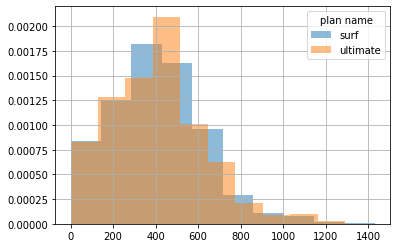

In [34]:
surf_calls["total_minutes"].hist(ax=plt.gca(), density=True, alpha=0.5, label="surf")
ultimate_calls["total_minutes"].hist(ax=plt.gca(), density=True, alpha=0.5, label="ultimate")
plt.legend(title="plan name")


# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [35]:
print("la información estadística general del plan surf es:") 
print(surf_calls["total_minutes"].describe())

print()
print("la información estadística general del plan utimate es:") 
print(ultimate_calls["total_minutes"].describe())

varianza_surf = surf_calls["total_minutes"].var()
varianza_ultimate = ultimate_calls["total_minutes"].var()

media_surf = surf_calls["total_minutes"].mean()
media_ultimate = ultimate_calls["total_minutes"].mean()

print()

print("la varianza de la duración mensual de llamadas del plan surf es:")
print(varianza_surf)

print("la varianza de la duración mensual de llamadas del plan ultimate es:")
print(varianza_ultimate)

print()

print("la media de la duración mensual de llamadas del plan surf es:")
print(media_surf)

print("la media de la duración mensual de llamadas del plan ultimate es:")
print(media_ultimate)

# Calcula la media y la varianza de la duración mensual de llamadas.



la información estadística general del plan surf es:
count    1573.000000
mean      404.762390
std       221.664397
min         0.000000
25%       255.470000
50%       401.760000
75%       543.680000
max      1431.220000
Name: total_minutes, dtype: float64

la información estadística general del plan utimate es:
count     720.000000
mean      406.193083
std       227.246499
min         0.000000
25%       246.290000
50%       398.585000
75%       532.227500
max      1292.090000
Name: total_minutes, dtype: float64

la varianza de la duración mensual de llamadas del plan surf es:
49135.10489072031
la varianza de la duración mensual de llamadas del plan ultimate es:
51640.97140216272

la media de la duración mensual de llamadas del plan surf es:
404.76239033693577
la media de la duración mensual de llamadas del plan ultimate es:
406.19308333333333


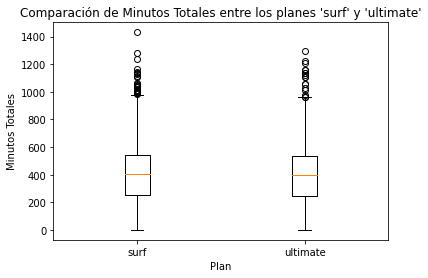

In [36]:
data = [surf_calls['total_minutes'], ultimate_calls['total_minutes']]

plt.boxplot(data)

plt.xticks([1, 2], ['surf', 'ultimate'])

plt.title("Comparación de Minutos Totales entre los planes 'surf' y 'ultimate'")


plt.xlabel('Plan')
plt.ylabel('Minutos Totales')

plt.show()

# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?] No parecen existir diferencias significativas en minutos totales en función al plan que usan.   

### Mensajes

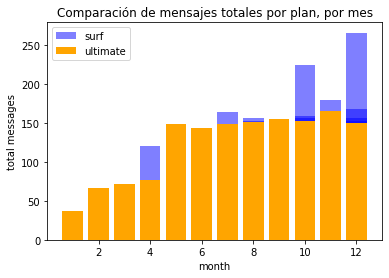

In [37]:
surf_messages= data_fusion_plan_info.query("plan== 'surf'")
ultimate_messages= data_fusion_plan_info.query("plan== 'ultimate'")

colores=["blue", "orange"]

plt.bar(surf_messages['month'], surf_messages['total_messages'],alpha=0.5, color=colores[0], label='surf')
plt.bar(ultimate_messages['month'], ultimate_messages['total_messages'], color=colores[1], label="ultimate")
plt.xlabel('month')
plt.ylabel('total messages')
plt.title('Comparación de mensajes totales por plan, por mes')

plt.legend()

plt.show()# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan



In [38]:
varianza_surf = surf_messages["total_messages"].var()
varianza_ultimate = ultimate_messages["total_messages"].var()

media_surf = surf_messages["total_messages"].mean()
media_ultimate = ultimate_messages["total_messages"].mean()

print()

print("la varianza de los mensajes del plan surf es:")
print(varianza_surf)

print("la varianza de los mensajes del plan ultimate es:")
print(varianza_ultimate)

print()

print("la media de los mensajes del plan surf es:")
print(media_surf)

print("la media de los mensajes del plan ultimate es:")
print(media_ultimate)





la varianza de los mensajes del plan surf es:
1126.7245219504066
la varianza de los mensajes del plan ultimate es:
1208.756743548138

la media de los mensajes del plan surf es:
31.15956770502225
la media de los mensajes del plan ultimate es:
37.55138888888889


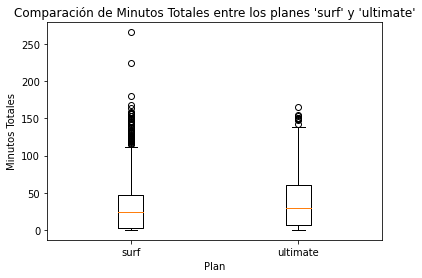

In [39]:
data = [surf_messages['total_messages'], ultimate_messages['total_messages']]

plt.boxplot(data)

plt.xticks([1, 2], ['surf', 'ultimate'])

plt.title("Comparación de Minutos Totales entre los planes 'surf' y 'ultimate'")


plt.xlabel('Plan')
plt.ylabel('Minutos Totales')

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?] Respecto a los mensajes, si parece existir un ligero consumo superior en los usuarios del plan surf. 

### Internet

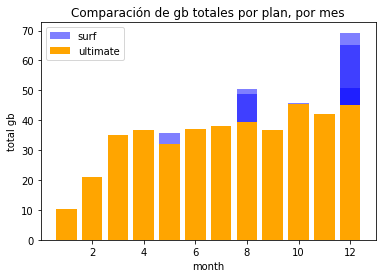

In [40]:
surf_internet= data_fusion_plan_info.query("plan== 'surf'")
ultimate_internet= data_fusion_plan_info.query("plan== 'ultimate'")

colores=["blue", "orange"]

plt.bar(surf_internet['month'], surf_internet['total_gb'],alpha=0.5, color=colores[0], label='surf')
plt.bar(ultimate_internet['month'], ultimate_internet['total_gb'], color=colores[1], label="ultimate")
plt.xlabel('month')
plt.ylabel('total gb')
plt.title('Comparación de gb totales por plan, por mes')

plt.legend()

plt.show()

In [41]:
varianza_surf_gb = surf_internet["total_gb"].var()
varianza_ultimate_gb = ultimate_internet["total_gb"].var()

media_surf_gb = surf_internet["total_gb"].mean()
media_ultimate_gb = ultimate_internet["total_gb"].mean()

print()

print("la varianza de los gb del plan surf es:")
print(varianza_surf_gb)

print("la varianza de los mensajes del plan ultimate es:")
print(varianza_ultimate_gb)

print()

print("la media de los mensajes del plan surf es:")
print(media_surf_gb)

print("la media de los mensajes del plan ultimate es:")
print(media_ultimate_gb)


la varianza de los gb del plan surf es:
61.24152740290447
la varianza de los mensajes del plan ultimate es:
58.796208690508195

la media de los mensajes del plan surf es:
16.170198720845914
la media de los mensajes del plan ultimate es:
16.811230170355905


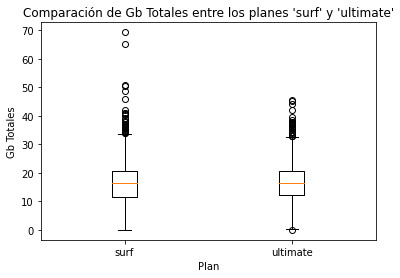

In [42]:
data = [surf_internet['total_gb'], ultimate_internet['total_gb']]

plt.boxplot(data)

plt.xticks([1, 2], ['surf', 'ultimate'])

plt.title("Comparación de Gb Totales entre los planes 'surf' y 'ultimate'")


plt.xlabel('Plan')
plt.ylabel('Gb Totales')

plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?] A pesar de no encontrar diferencias significativas, en este caso si pudieramos asumir que existe un comportamiento diferente entre los usuarios de los planes, especialmente en el mes de diciembre donde los usuarios del plan surf consumieron signficativamente mas datos. 

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

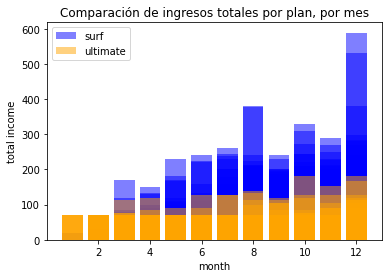

In [43]:
surf_income= data_fusion_plan_info.query("plan== 'surf'")
ultimate_income= data_fusion_plan_info.query("plan== 'ultimate'")

colores=["blue", "orange"]

plt.bar(surf_income['month'], surf_income['income_month'],alpha=0.5, color=colores[0], label='surf')
plt.bar(ultimate_income['month'], ultimate_income['income_month'],alpha=0.5, color=colores[1], label="ultimate")
plt.xlabel('month')
plt.ylabel('total income')
plt.title('Comparación de ingresos totales por plan, por mes')

plt.legend()

plt.show()

In [44]:
varianza_surf_income = surf_income["income_month"].var()
varianza_ultimate_income = ultimate_income["income_month"].var()

media_surf_income = surf_income["income_month"].mean()
media_ultimate_income = ultimate_messages["income_month"].mean()

print()

print("la varianza de los ingresos del plan surf es:")
print(varianza_surf_income)

print("la varianza de los ingresos del plan ultimate es:")
print(varianza_ultimate_income)

print()

print("la media de los ingresos del plan surf es:")
print(media_surf_income)

print("la media de los ingresos del plan ultimate es:")
print(media_ultimate_income)


la varianza de los ingresos del plan surf es:
3053.9554654117874
la varianza de los ingresos del plan ultimate es:
129.8484855509195

la media de los ingresos del plan surf es:
60.32734621741895
la media de los ingresos del plan ultimate es:
72.31388888888888


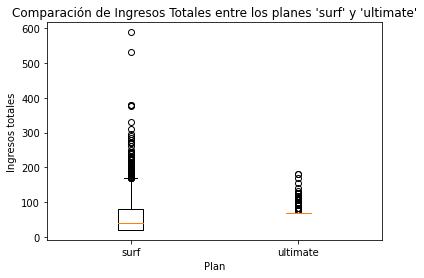

In [45]:
data = [surf_income['income_month'], ultimate_income['income_month']]

plt.boxplot(data)

plt.xticks([1, 2], ['surf', 'ultimate'])

plt.title("Comparación de Ingresos Totales entre los planes 'surf' y 'ultimate'")


plt.xlabel('Plan')
plt.ylabel('Ingresos totales')

plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
#Las diferencias respecto a los ingresos son bastante llamativas, ya que mientras los usuarios del plan ultimate se apegan mas a su tarifa básica con una media de 72USD, los usuarios del plan surf excenden continuamente el costo base de su plan con una media de 60usd

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
#La hipótesis nula sugiere que el ingreso promedio percibido por los usuarios del plan Ultimate es igual que el de los usuarios del plan Surf.
#La hipótesis alternativa sugiere un comportamiento diferente entre los usuarios del plan Ultimate y el de los usuarios del plan Surf.

In [47]:
alpha=0.5
ttest_ind(
    data_fusion_plan_info.query("plan== 'surf'")["income_month"],
    data_fusion_plan_info.query("plan== 'ultimate'")["income_month"],
    equal_var=False
)
    # Prueba las hipótesis
#La prueba ttest_ind arroja un valor p de 3.5320199509520717e-16 , por lo cual se acepta la hipotesis 
#alternativa que propone un comportamiento diferente entre los usuarios del plan Ultimate respecto a los 
#usuarios del plan surf.


Ttest_indResult(statistic=-8.228840784742438, pvalue=3.5320199509520717e-16)


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

Listo, agregué el elemento equal_var=false, al no cambiar la condición respecto a alpha las hipotesis se mantienen, muchas gracias por el comentario. 

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
#La hipótesis nula sugiere que el ingreso promedio percibido por los usuarios del área NY-NJ es igual que el del resto de las regiones.
#La hipótesis alternativa sugiere un comportamiento diferente entre los usuarios del área NY-NJ y el del resto de las regiones. 

In [48]:
alpha=0.05
ttest_ind(
    data_fusion_plan_info.query("city== 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["income_month"],
    data_fusion_plan_info.query("city!= 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["income_month"],
    equal_var = False
)


# Prueba las hipótesis
#La prueba ttest_ind arroja un valor p de 0.03, por lo cual se acepta la hipotesis alternativa que 
#propone un comportamiento diferente entre los usuarios del área NY-NJ respecto a los usuarios de 
#las otras regiones.


Ttest_indResult(statistic=-2.1597353056435127, pvalue=0.031214139070912725)

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Si el motivo de este análisis es encontrar el plan que genera mas ingresos para poder invertir en publicidad, sin dudas el plan Surf tiene mayor potencial para generar mayores ingresos, ya que no solo existe evidencia de que los usuarios tienen un comportamiento diferente, los usuarios del plan surf en promedio gastan más de 3 veces lo que cuesta su plan base. 

Esto combinado con que los usuarios casi siempre prefieren costos mas bajos ofrece una oportunidad interesante para capitalizar con una campaña de marketing que atraiga mas usuarios del plan Surf. 